In [20]:
import collections
import matplotlib.pyplot as plt

### Lambda Virus

In [1]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2019-02-19 17:42:52--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 99.84.231.225, 99.84.231.215, 99.84.231.217, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|99.84.231.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa’

lambda_virus.fa     100%[===================>]  48.12K  --.-KB/s    in 0.1s    

2019-02-19 17:42:52 (478 KB/s) - ‘lambda_virus.fa’ saved [49270/49270]



In [3]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [4]:
len(genome)

48502

### Base Frequency

In [5]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [7]:
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

### Human sample base quality (FastQ encoding/Phred+33)

In [9]:
!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

--2019-02-19 17:59:47--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.35.127.133, 13.35.127.39, 13.35.127.173, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.35.127.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K  --.-KB/s    in 0.1s    

2019-02-19 17:59:48 (2.15 MB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [ ]:
@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

In [11]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [12]:
print(seqs[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']


In [13]:
print(quals[:5])

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


### Quality distribution

In [14]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [16]:
# This equates to about a 32% chance that this basecall was correct

phred33ToQ('#')

2

In [18]:
# This equates to a very high confidence of correct basecalling

phred33ToQ('J')

41

### Visualizing quality scores

In [19]:
def creatHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = creatHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


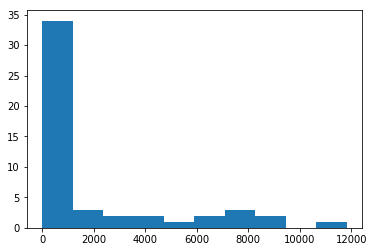

In [22]:
plt.hist(h);